<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/Twelfth_Clone_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.shape
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G


# Problem 2
1.   The dataset includes 79 variables that are used to determine the cost of
     houses in Iowa city. The variables include information that looks at the
     surrounding environment for example paved drives, the land properties for
     example slope, and finally information on the house itself for example
     kitchen space. All these information are used to determine the cost of the
     houses. Some spaces dont have information. Some are important while others 
     look same all through therefore can be ignored.



In [3]:
#Problem 3(a)
t = df.info(verbose=True) # information of all colums
#print(t)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have a total of 38 variants as numerical and 43 variants as text data.

In [4]:
# Problem 3(b)
s = df.iloc[:,80] #row location
print(s)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


The target variable this time is the sale price.

In [5]:
# Problem 3(c)
v = df.describe() # mean, sd,and quartiles info.
print(v)

                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]


In [6]:
# Problem 4(a)
Total = df.count()
Total
missing_ratio = df.isna().mean()*100
missing_ratio
Final = pd.concat([Total, missing_ratio], axis=1)
Finals = Final.rename({'0':'Total', '1':'missing_ratio'}, axis=1)
print(Finals)


                  0          1
Id             1460   0.000000
MSSubClass     1460   0.000000
MSZoning       1460   0.000000
LotFrontage    1201  17.739726
LotArea        1460   0.000000
...             ...        ...
MoSold         1460   0.000000
YrSold         1460   0.000000
SaleType       1460   0.000000
SaleCondition  1460   0.000000
SalePrice      1460   0.000000

[81 rows x 2 columns]


In [7]:
#Problem 4(b)
perc = 0.3425
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, 
                thresh=min_count)
print(mod_df)

        Id  MSSubClass MSZoning  ...  SaleType SaleCondition SalePrice
0        1          60       RL  ...        WD        Normal    208500
1        2          20       RL  ...        WD        Normal    181500
2        3          60       RL  ...        WD        Normal    223500
3        4          70       RL  ...        WD       Abnorml    140000
4        5          60       RL  ...        WD        Normal    250000
...    ...         ...      ...  ...       ...           ...       ...
1455  1456          60       RL  ...        WD        Normal    175000
1456  1457          20       RL  ...        WD        Normal    210000
1457  1458          70       RL  ...        WD        Normal    266500
1458  1459          20       RL  ...        WD        Normal    142125
1459  1460          20       RL  ...        WD        Normal    147500

[1460 rows x 63 columns]


In [8]:
# Problem 4(c)
perc = 7.9365
min_count =  int(((100-perc)/100)*mod_df.shape[0] + 1)
mod_df2 = mod_df.dropna( axis=0, 
                thresh=min_count)
print(mod_df2)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, ExterQual, ExterCond, Foundation, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageCars, GarageArea, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


# Problem 5
1.   Skewness is a measure of symmetry, or more precisely, the lack of
     symmetry. A distribution, or data set, is symmetric if it looks the same
     to the left and right of the center point.
2.   Kurtosis is a measure of whether the data are heavy-tailed or light-tailed
     relative to a normal distribution. That is, data sets with high kurtosis
     tend to have heavy tails, or outliers. Data sets with low kurtosis tend to
     have light tails, or lack of outliers.



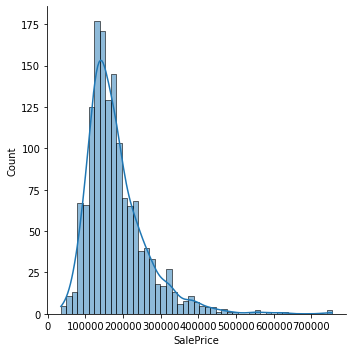

In [10]:
# Problem 6(a)
import seaborn as sns
sns.displot(data=df, x="SalePrice", kde=True)

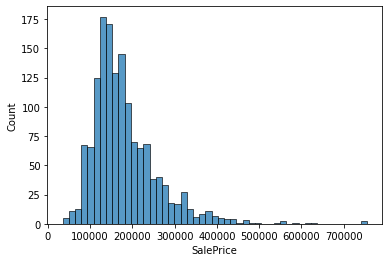

In [28]:
# Problem 6(b)
sns.histplot(data=df, x="SalePrice")

In [15]:
# Problem 6(c)
Skew = df['SalePrice'].astype(float).skew() 
Kurtosis = df['SalePrice'].astype(float).kurt()
print(Skew)
print(Kurtosis)

1.8828757597682129
6.536281860064529


In [24]:
# Problem 6(d)
import numpy as np
df['log_SalePrice']=np.log1p(df.SalePrice)

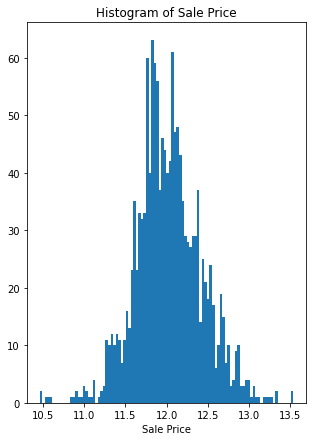

In [27]:
# Problem 6(e)
import matplotlib.pyplot as plt
plt.figure(figsize=(5,7))
plt.hist(df['log_SalePrice'], bins=100)
plt.xlabel("Sale Price")
plt.title("Histogram of Sale Price")
plt.show()

In [25]:
Skew = df['log_SalePrice'].astype(float).skew() 
Kurtosis = df['log_SalePrice'].astype(float).kurt()
print(Skew)
print(Kurtosis)

0.12134661989685333
0.809519155707878


Text(0.5, 1.0, 'Heat Map')

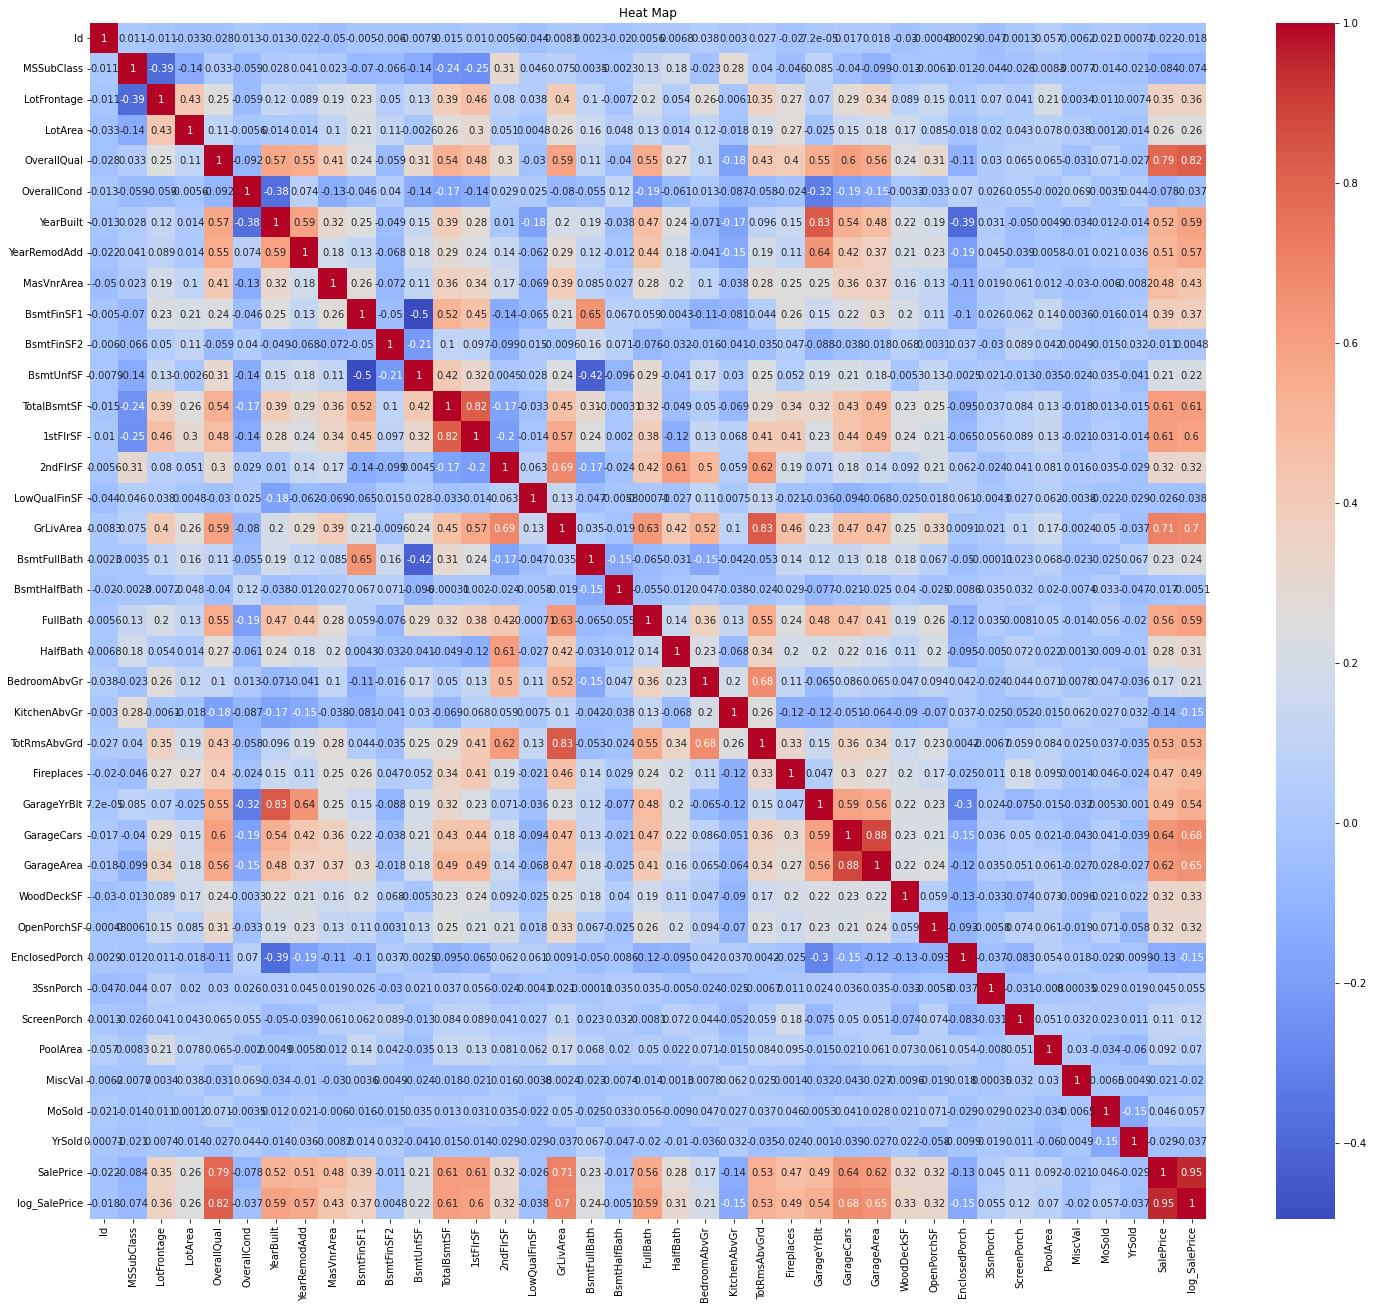

In [31]:
# Problem 7(a)
corr = df.corr()
fig, ax =plt.subplots(figsize=(25,22))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.title('Heat Map')

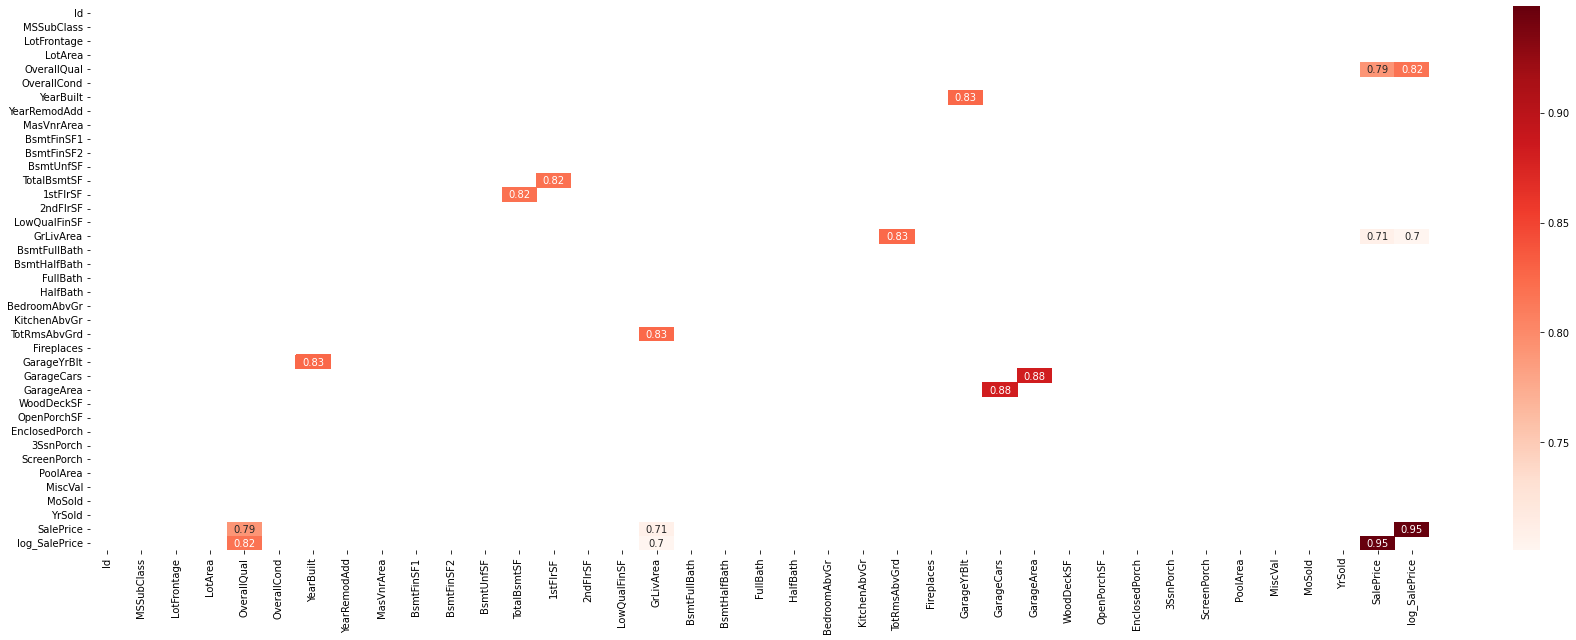

In [34]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .7) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [39]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .685)

2ndFlrSF      GrLivArea        0.687501
GrLivArea     log_SalePrice    0.700927
SalePrice     GrLivArea        0.708624
              OverallQual      0.790982
OverallQual   log_SalePrice    0.817185
1stFlrSF      TotalBsmtSF      0.819530
TotRmsAbvGrd  GrLivArea        0.825489
GarageYrBlt   YearBuilt        0.825667
GarageCars    GarageArea       0.882475
SalePrice     log_SalePrice    0.948374
Id            Id                    NaN
dtype: float64

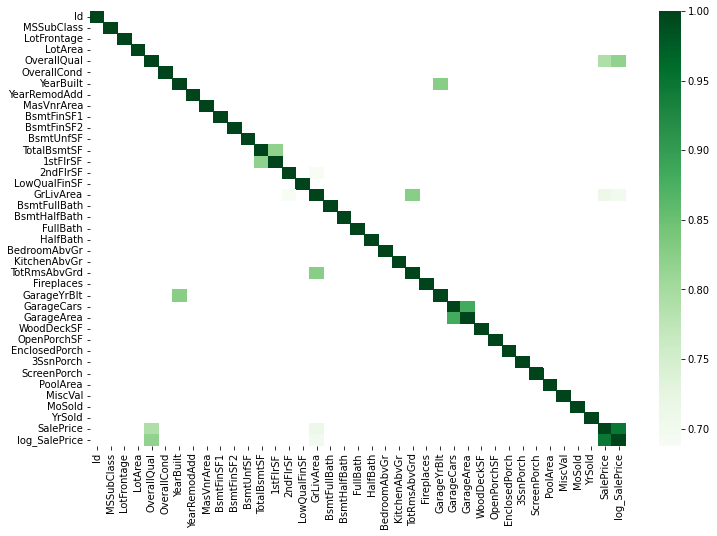

In [41]:
corr = df.corr()

kot = corr[corr>=.685]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [46]:
# map features to their absolute correlation values
corr = df.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
display(corr_cols[corr_cols > 0.685])

log_SalePrice    0.948374
SalePrice        0.948374
GarageArea       0.882475
GarageCars       0.882475
YearBuilt        0.825667
GarageYrBlt      0.825667
GrLivArea        0.825489
TotRmsAbvGrd     0.825489
TotalBsmtSF      0.819530
1stFlrSF         0.819530
OverallQual      0.817185
2ndFlrSF         0.687501
dtype: float64

In [47]:
# Returns correlation matrix
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

# flattens correlation matrix with bounds
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

# Returns correlation for a variable from flattened correlation matrix
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat
#Share
#Improve this answer
#Follow

The relationship between two variables is generally considered strong when their r value is larger than 0.7. The correlation r measures the strength of the linear relationship between two quantitative variables.